In [94]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
rcParams['figure.figsize']= 10,7.5

In [95]:
df = pd.read_csv('covid_uts.csv')
df

,Negara,Tanggal,Varian,N_Positif
0,Egypt,2020-05-11,Alpha,0
1,Egypt,2020-05-11,Beta,0
2,Egypt,2020-05-11,Gamma,0
3,Egypt,2020-05-11,Mu,0
4,Egypt,2020-05-11,Omicron,0
...,...,...,...,...
1485,Malaysia,2021-12-27,Alpha,0
1486,Malaysia,2021-12-27,Beta,0
1487,Malaysia,2021-12-27,Gamma,0
1488,Malaysia,2021-12-27,Mu,0


# Data Wrangling

In [96]:
df.head() # menampilkan 5 data pertama

,Negara,Tanggal,Varian,N_Positif
0,Egypt,2020-05-11,Alpha,0
1,Egypt,2020-05-11,Beta,0
2,Egypt,2020-05-11,Gamma,0
3,Egypt,2020-05-11,Mu,0
4,Egypt,2020-05-11,Omicron,0


In [97]:
df.tail() # menampilkan 5 data terakhir

,Negara,Tanggal,Varian,N_Positif
1485,Malaysia,2021-12-27,Alpha,0
1486,Malaysia,2021-12-27,Beta,0
1487,Malaysia,2021-12-27,Gamma,0
1488,Malaysia,2021-12-27,Mu,0
1489,Malaysia,2021-12-27,Omicron,5


In [98]:
negaras = df['Negara'].unique()
print('Jumlah Negara: ', len(negaras))
for neg in negaras:
    print('-',neg)

Jumlah Negara:  7
- Egypt
- Finland
- Germany
- Indonesia
- Italy
- Japan
- Malaysia


In [99]:
varians = df['Varian'].unique()
print('Jumlah Varian Covid: ' , len(varians))
for v in varians:
    print('-',v)

Jumlah Varian Covid:  5
- Alpha
- Beta
- Gamma
- Mu
- Omicron


In [100]:
pd.melt(df) #untuk mengubah kolom menjadi baris

,variable,value
0,Negara,Egypt
1,Negara,Egypt
2,Negara,Egypt
3,Negara,Egypt
4,Negara,Egypt
...,...,...
5955,N_Positif,0
5956,N_Positif,0
5957,N_Positif,0
5958,N_Positif,0


In [101]:
df.rename(columns={'Varian': 'Variant'}, inplace=True) #untuk mengganti nama kolom
df

,Negara,Tanggal,Variant,N_Positif
0,Egypt,2020-05-11,Alpha,0
1,Egypt,2020-05-11,Beta,0
2,Egypt,2020-05-11,Gamma,0
3,Egypt,2020-05-11,Mu,0
4,Egypt,2020-05-11,Omicron,0
...,...,...,...,...
1485,Malaysia,2021-12-27,Alpha,0
1486,Malaysia,2021-12-27,Beta,0
1487,Malaysia,2021-12-27,Gamma,0
1488,Malaysia,2021-12-27,Mu,0


In [102]:
df.sort_values('Negara', ascending=False) #untuk mencara data dari terbesar hingga ke terkecil

,Negara,Tanggal,Variant,N_Positif
1489,Malaysia,2021-12-27,Omicron,5
1332,Malaysia,2020-10-26,Gamma,0
1356,Malaysia,2021-01-04,Beta,0
1355,Malaysia,2021-01-04,Alpha,1
1354,Malaysia,2020-12-21,Omicron,0
...,...,...,...,...
135,Egypt,2021-05-31,Alpha,3
134,Egypt,2021-05-17,Omicron,0
133,Egypt,2021-05-17,Mu,0
132,Egypt,2021-05-17,Gamma,0


In [103]:
df.drop(columns=['Tanggal']) #menghapus kolom yang di inginkan

,Negara,Variant,N_Positif
0,Egypt,Alpha,0
1,Egypt,Beta,0
2,Egypt,Gamma,0
3,Egypt,Mu,0
4,Egypt,Omicron,0
...,...,...,...
1485,Malaysia,Alpha,0
1486,Malaysia,Beta,0
1487,Malaysia,Gamma,0
1488,Malaysia,Mu,0


In [104]:
df.describe() # menghitung statistik

,N_Positif
count,1490.000000
mean,133.230872
std,1067.331772
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,18317.000000


In [105]:
df.info() # untuk mengaetahui informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Negara     1490 non-null   object
 1   Tanggal    1490 non-null   object
 2   Variant    1490 non-null   object
 3   N_Positif  1490 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.7+ KB


In [106]:
df2=df.groupby(['Negara', 'Variant']).sum() #menggabungkan data berdasarkan kolom yang sama
df2

N_Positif
Negara    Variant           
Egypt     Alpha           29
          Beta             0
          Gamma            0
          Mu               0
          Omicron          1
Finland   Alpha         6800
          Beta          1213
          Gamma           19
          Mu               5
          Omicron          0
Germany   Alpha       104138
          Beta          2303
          Gamma          858
          Mu              17
          Omicron       2270
Indonesia Alpha           81
          Beta            22
          Gamma            0
          Mu               0
          Omicron        130
Italy     Alpha        26877
          Beta           116
          Gamma         2488
          Mu              83
          Omicron        526
Japan     Alpha        49841
          Beta           101
          Gamma          120
          Mu               3
          Omicron        150
Malaysia  Alpha           33
          Beta           273
          Gamma            0
          Mu               0
          Omicron         17

In [107]:
df3 = df2.query("Variant=='Omicron' | Variant=='Alpha'| Variant=='Beta' ") #mencari data yang sesuai dengan kriteria
df3.reset_index(inplace=True)
df3

,Negara,Variant,N_Positif
0,Egypt,Alpha,29
1,Egypt,Beta,0
2,Egypt,Omicron,1
3,Finland,Alpha,6800
4,Finland,Beta,1213
5,Finland,Omicron,0
6,Germany,Alpha,104138
7,Germany,Beta,2303
8,Germany,Omicron,2270
9,Indonesia,Alpha,81


# Data Visualisasi

In [128]:
df_idn = df.groupby(['Negara','Tanggal']).sum() #menggabungkan data berdasarkan kolom yang sama
df_idn = df_idn.loc[['Indonesia']].reset_index() #mencari data yang sesuai dengan kriteria
df_idn['Tanggal'] = pd.to_datetime(df_idn['Tanggal']) #mengubah data tanggal menjadi format datetime
df_idn = df_idn.set_index('Tanggal') #mengubah kolom tanggal menjadi index

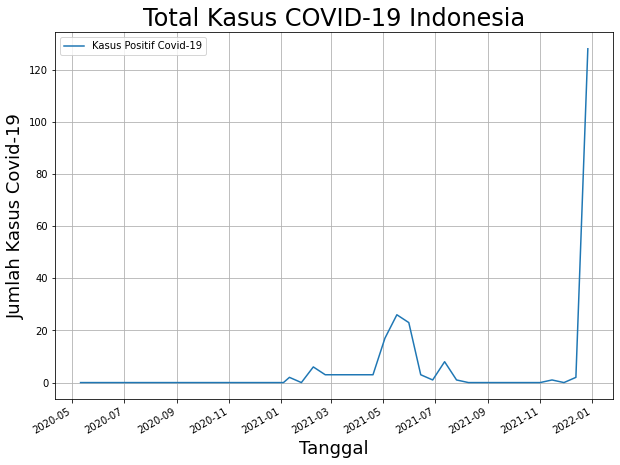

In [124]:
plt.figure( figsize=(10,7.5) ) #untuk mengatur ukuran plot
ax = plt.gca() 
df_idn.plot(ax=ax)
ax.grid()
ax.set_xlabel('Tanggal',fontsize=18)
ax.set_ylabel('Jumlah Kasus Covid-19',fontsize=18)
ax.legend(['Kasus Positif Covid-19'])
ax.set_title('Total Kasus COVID-19 Indonesia',fontsize=24)
plt.show()

In [132]:
df_idn

,Negara,N_Positif
Tanggal,,
2020-05-11,Indonesia,0
2020-05-25,Indonesia,0
2020-06-08,Indonesia,0
2020-06-22,Indonesia,0
2020-07-06,Indonesia,0
2020-07-20,Indonesia,0
2020-08-03,Indonesia,0
2020-08-17,Indonesia,0
2020-08-31,Indonesia,0


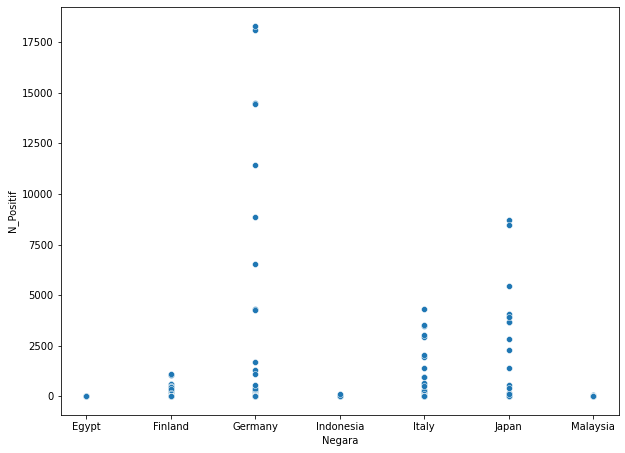

In [110]:
sns.scatterplot(data=df, x=df['Negara'], y=df['N_Positif']); #menampilkan grafik scatterplot

# Data Processing

In [127]:
processing = df3[['Negara']]
negara = processing['Negara'].unique()

omicrons = df3[df3['Variant']=='Omicron']
o = omicrons[['N_Positif']].values.flatten()
alpha = df3[df3['Variant']=='Alpha']
a= alpha[['N_Positif']].values.flatten()
beta = df3[df3['Variant']=='Beta']
b = beta[['N_Positif']].values.flatten()

datas = {
'Negara': negara,
'Omicron': o,
'Alpha':a,
'Beta':b,
}
df_new = pd.DataFrame(datas)
df_new

,Negara,Omicron,Alpha,Beta
0,Egypt,1,29,0
1,Finland,0,6800,1213
2,Germany,2270,104138,2303
3,Indonesia,130,81,22
4,Italy,526,26877,116
5,Japan,150,49841,101
6,Malaysia,17,33,273


In [112]:
countries = ['Indonesia','Malaysia','Japan','Italy','Finland']
df4 = df_new.query(" Negara in @countries " )
df4.reset_index(inplace=True)
df4

,index,Negara,Omicron,Alpha,Beta
0,1,Finland,0,6800,1213
1,3,Indonesia,130,81,22
2,4,Italy,526,26877,116
3,5,Japan,150,49841,101
4,6,Malaysia,17,33,273


In [113]:
temps = df4[['Omicron','Alpha','Beta']].values
temps

array([[    0,  6800,  1213],
       [  130,    81,    22],
       [  526, 26877,   116],
       [  150, 49841,   101],
       [   17,    33,   273]], dtype=int64)

In [114]:
def euclid(x,y):
    
    return np.linalg.norm(x-y)
lneg = len(temps)
d_matrix = [ [ round(euclid(temps[i],temps[j]),2 ) for j in range(lneg) ] for i in range(lneg)]

In [115]:
negara1 = df4[['Negara']].values.flatten()
df5 = pd.DataFrame( d_matrix,columns = negara1, index = negara1 )
df5

,Finland,Indonesia,Italy,Japan,Malaysia
Finland,0.00,6824.98,20113.83,43055.62,6832.00
Indonesia,6824.98,0.00,26799.09,49760.07,279.42
Italy,20113.83,26799.09,0.00,22967.08,26849.28
Japan,43055.62,49760.07,22967.08,0.00,49808.47
Malaysia,6832.00,279.42,26849.28,49808.47,0.00


In [116]:
d1 = df5.loc['Indonesia']
d2 = df5.columns.values
def similarity(d):
    return 1/(d+0.001)
d3 = map( lambda x,y:[ similarity(x) ] + [y] ,d1,d2)
d4 = list(d3)
d4.sort(key=lambda x:x[0],reverse=True)
d4 = d4[1:]
# Urutan Similarity:
d4

[[0.0035788290787020305, 'Malaysia'],
 [0.00014652055441619546, 'Finland'],
 [3.731469847242207e-05, 'Italy'],
 [2.0096434347933307e-05, 'Japan']]

# Model Implementasi

 # METODE REGRESI LOGISTIK

In [117]:
X = df[['N_Positif']]
y = df['Negara']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [119]:
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

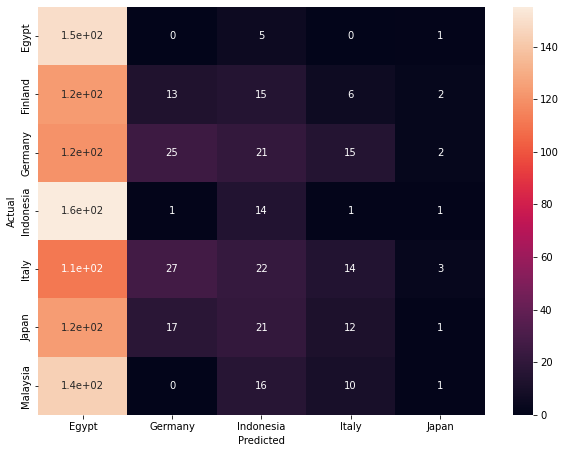

In [120]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [121]:
print('Akurasi: ', metrics.accuracy_score(y_test, y_pred))

Akurasi:  0.17030201342281878


In [122]:
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [123]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

       Egypt       0.16      0.96      0.28       155
     Finland       0.00      0.00      0.00       159
     Germany       0.29      0.11      0.16       183
   Indonesia       0.14      0.08      0.10       172
       Italy       0.26      0.11      0.15       177
       Japan       0.23      0.03      0.06       175
    Malaysia       0.00      0.00      0.00       171

    accuracy                           0.17      1192
   macro avg       0.16      0.18      0.11      1192
weighted avg       0.16      0.17      0.11      1192

0.174496644295302


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo